# Evolutionary Algorithms

In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

class Environment:
    
    def __init__(self):
        print("[Environment] Environment criado.\n\n")
        
    #Ex 1.a) 
    def random_pattern(self,size):
        pattern = ""
        
        for i in range(size):
            temp = str(random.randint(0, 1))
            pattern += temp
        
        return pattern
    
    #Ex 1.c)
    def proximityEvaluate(self,s1, s2):
        return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))
   
    #Ex 1.d)
    def fitnessEvaluate(self,s1, s2):
        return sum(ch1 == ch2 for ch1, ch2 in zip(s1, s2))
    
    #Ex 2
    def mutate_pattern(self,pattern):
        pattern = list(pattern)
        temp = random.randint(0,len(pattern)-1)

        if pattern[temp] == '0':
            pattern[temp] = '1'
        else:
            pattern[temp] = '0'

        return "".join(pattern)
    
    #Ex 4
    def crossover(self,parent1, parent2):
        child1, child2 = list(parent1).copy(), list(parent2).copy()
        
        if(len(parent1) > 2):
            pt = random.randint(1, len(parent1)-2)
        else:
            pt = random.randint(1, len(parent1)-1)
        
        child1 = parent1[:pt] + parent2[pt:]
        child2 = parent2[:pt] + parent1[pt:]

        return [child1, child2]
        
        

In [5]:
def graphBoxplot(data,number_bits, title, xlabel, ylabel, scale):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, positions = number_bits)
    if scale:
        plt.yscale("log")
    ax.set_title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

In [6]:
e = Environment()

[Environment] Environment criado.




#### Ex 1.b) - Pattern Guesser


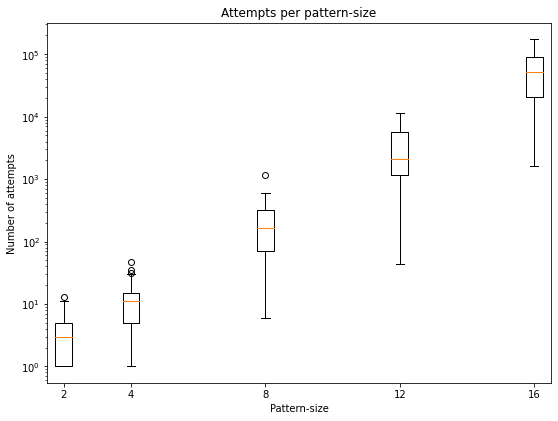

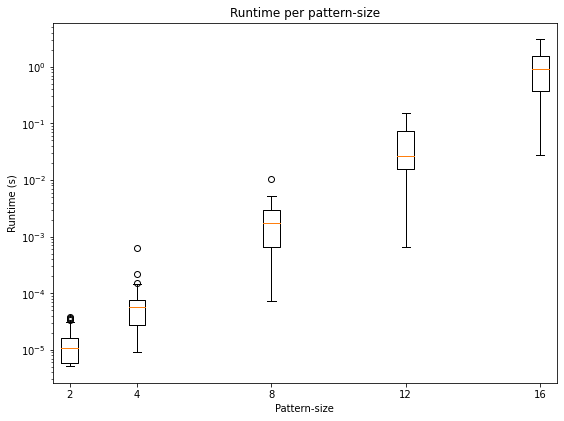

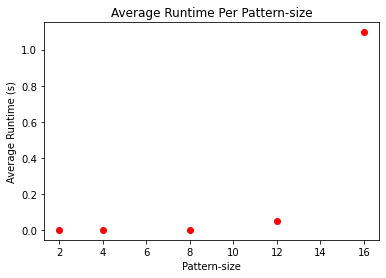

In [7]:
random.seed(1)

number_bits = [2, 4, 8, 12, 16]
positions = []
data_runtimes = []
data_attempts = []
maxTime = 3600 #1h

start_check_maxTime = timeit.default_timer()

for l in number_bits:
    end_check_maxTime = timeit.default_timer()
    if(end_check_maxTime - start_check_maxTime >= maxTime):
        break
    positions.append(l)
    
    runtimes = []
    attempts = []

    for i in range(30):
        end_check_maxTime = timeit.default_timer()
        if(end_check_maxTime - start_check_maxTime >= maxTime):
            break
        
        start = timeit.default_timer()
        find = False
        correct_pattern = e.random_pattern(l)

        j=0
        while not find:
            end_check_maxTime = timeit.default_timer()
            if(end_check_maxTime - start_check_maxTime >= maxTime):
                break
            j+=1
            aux = e.random_pattern(l)
            if aux == correct_pattern :
                attempts.append(j)
                find = True
        
        end = timeit.default_timer()
        runtimes.append(end - start)
        

    data_runtimes.append(runtimes)
    data_attempts.append(attempts)

graphBoxplot(data_attempts,positions, "Attempts per pattern-size", "Pattern-size", "Number of attempts",True)
graphBoxplot(data_runtimes,positions, "Runtime per pattern-size", "Pattern-size", "Runtime (s)",True)
    
fig, ax1 = plt.subplots()
average_runtime = []
for x in data_runtimes:
    average_runtime.append(np.mean(x))
ax1.plot(positions ,average_runtime,'ro' )
ax1.set_title("Average Runtime Per Pattern-size")
plt.ylabel('Average Runtime (s)')
plt.xlabel('Pattern-size') 
plt.show()

#### 1.b)
- À medida que vamos aumentado o tamanho do padrão de bits gerado, tanto o número de tentativas para achar o padrão correto como a duração dos runtimes vão sendo cada vez maiores, aumentado assim exponencialmente.  

## Ex 2

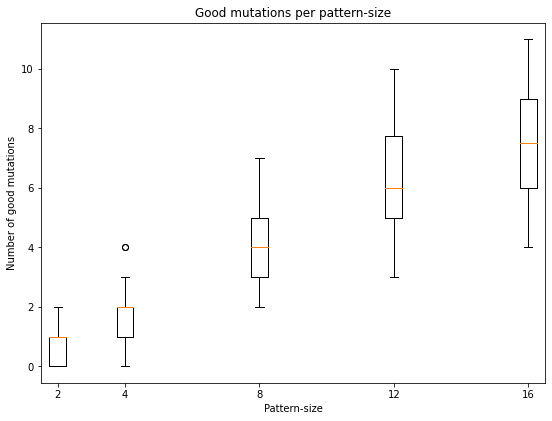

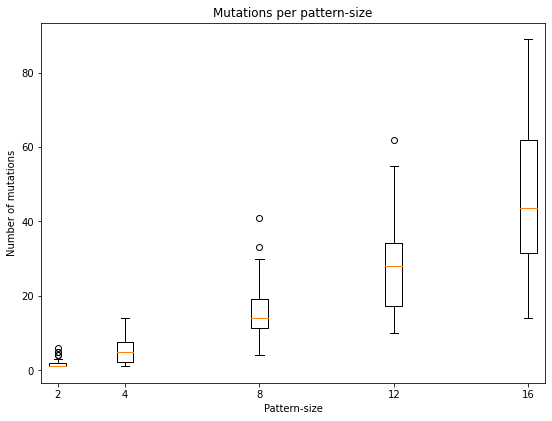

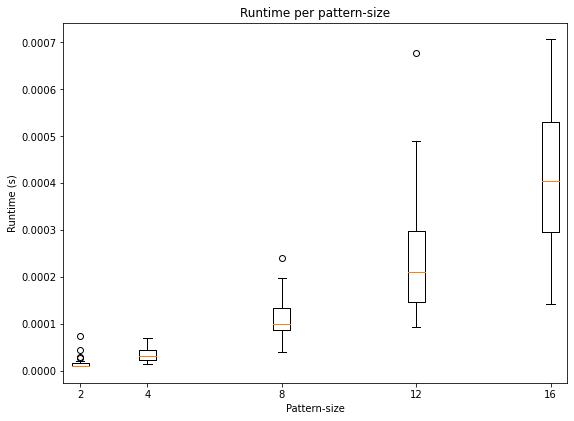

In [8]:
random.seed(1)

pattern_size = [2,4,8,12,16]

data_runtimes = []
data_mutations = []
data_good_mutations = []

for x in pattern_size:
    runtimes = []
    mutations = []
    good_mutations =[]
    
    for l in range(30):
        start = timeit.default_timer()
        
        correct_pattern = e.random_pattern(x)
        pattern = e.random_pattern(x)

        aux = 0
        for i in range(1000):
            temp = e.mutate_pattern(pattern)

            if(e.fitnessEvaluate(temp,correct_pattern) > e.fitnessEvaluate(pattern,correct_pattern)):
                aux+=1
                pattern = temp

            if(e.fitnessEvaluate(pattern,correct_pattern) == x): #x equivale ao fitness máximo
                break
        
        end = timeit.default_timer()
        runtimes.append(end-start)
        mutations.append(i+1)
        good_mutations.append(aux)
        
    data_runtimes.append(runtimes)
    data_mutations.append(mutations)
    data_good_mutations.append(good_mutations)

graphBoxplot(data_good_mutations,pattern_size, "Good mutations per pattern-size", "Pattern-size", "Number of good mutations", False)
graphBoxplot(data_mutations,pattern_size, "Mutations per pattern-size", "Pattern-size", "Number of mutations", False)
graphBoxplot(data_runtimes,pattern_size, "Runtime per pattern-size", "Pattern-size", "Runtime (s)" , False)

#### Ex 2
- Sim, tende a convergir para a melhor solução, visto que só mutamos o padrão anterior caso o valor de fitness do padrão mutado for maior do que o padrão anteriormente mutado/gerado, logo nunca irá ter a tendência de ir para um padrão pior do que estava, mas sim sempre para melhor.

## Ex 3

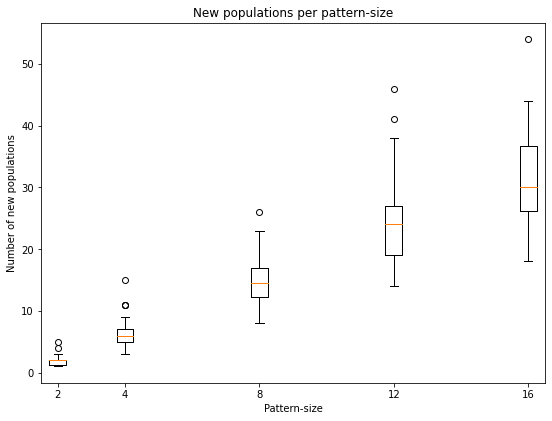

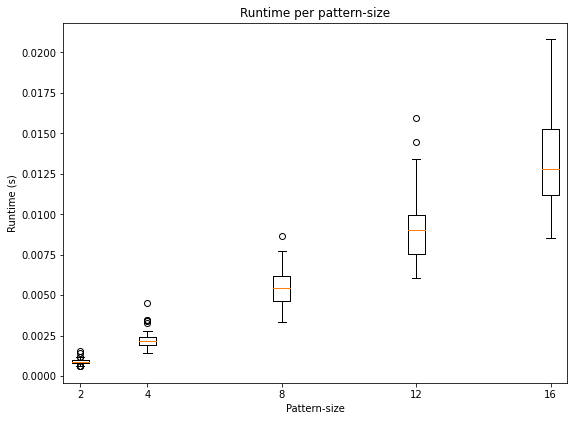

In [10]:
random.seed(1)

pattern_sizes = [2,4,8,12,16]

data_runtimes = []
data_populations = []
positions = []

for pattern_size in pattern_sizes:
    number_of_populations = []
    runtimes = []
    
    for l in range(30):
        start = timeit.default_timer()
        
        population = []
        patterns = []
        fitnesses =[]

        correct_pattern = e.random_pattern(pattern_size)

        for i in range(100): 
            pattern = e.random_pattern(pattern_size)
            fitness = e.fitnessEvaluate(pattern,correct_pattern)

            patterns.append(pattern)
            fitnesses.append(fitness)

        population = sorted(zip(patterns,fitnesses), key=lambda x: x[1] , reverse=True)

        max_fitness = pattern_size
        goal_sum_fitness = 30*(max_fitness)+70*(max_fitness-1)

        populacoes = 0
        sum_fitness = 0
        while sum_fitness < goal_sum_fitness:  #[sum_fitness < goal_sum_fitness] Condição para ver se a melhor evolução
            populacoes+=1                      #foi atingida, pois assim que os 30 melhores atingirem o máximo de fitness,
            best_30 = []                       #os outros 70 irão ser sempre menores do que o máximo de fitness, 
                                               #logo irá estagnar a evolução   

            for i in range(30):
                best_30.append(population[i])

            population = best_30

            for i in range(70):
                temp = best_30[random.randint(0,29)][0]

                aux_pattern = e.mutate_pattern(temp)
                aux_fitness = e.fitnessEvaluate(aux_pattern,correct_pattern)

                population.append((aux_pattern,aux_fitness))

            population = sorted(population, key=lambda x: x[1] , reverse=True)
            sum_fitness = sum(j for i, j in population)

        end = timeit.default_timer()
        runtimes.append(end-start)
        number_of_populations.append(populacoes)
        
    data_runtimes.append(runtimes)
    data_populations.append(number_of_populations)
        
graphBoxplot(data_populations,pattern_sizes, "New populations per pattern-size", "Pattern-size", "Number of new populations", False)
graphBoxplot(data_runtimes,pattern_sizes, "Runtime per pattern-size", "Pattern-size", "Runtime (s)" , False)        

#### Ex 3
- Ao comparar os métodos de pesquisa até agora podemos observar que o método do Ex 2 é o que apresenta melhores resultados em relação aos runtimes, porém o método do Ex 3 (Genetic Algorithm), teve menos populações do que as mutações e tentativas do Ex 2 e Ex 1, respetivamente. O método de pesquisa do Ex 1 (Random) foi o que apresentou piores resultados, visto que à medida à medida que o tamanho do padrão aumentava este iria demorar cada vez mais para achar o correto, porém para bits de tamanho até 4 os os runtimes equiparavam-se aos do Ex 2.

### Ex 4

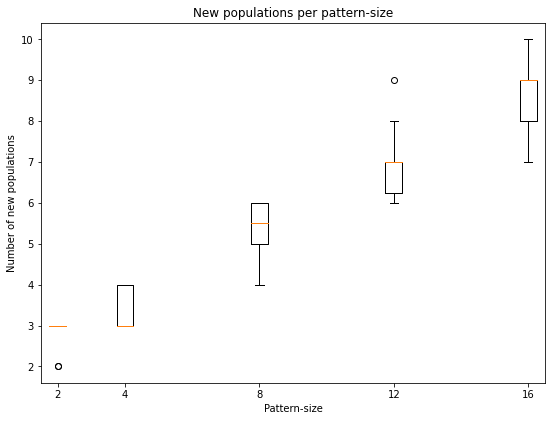

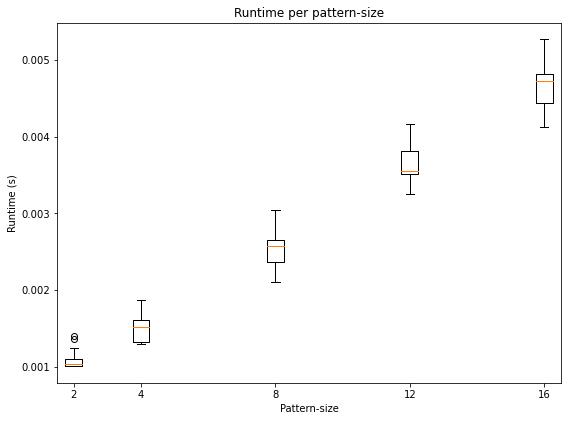

In [11]:
random.seed(1)

pattern_sizes = [2,4,8,12,16]

data_runtimes = []
data_populations = []
positions = []

for pattern_size in pattern_sizes:
    number_of_populations = []
    runtimes = []
    
    for l in range(30):
        start = timeit.default_timer()
        
        population = []
        patterns = []
        fitnesses =[]

        correct_pattern = e.random_pattern(pattern_size)

        for i in range(100): 
            pattern = e.random_pattern(pattern_size)
            fitness = e.fitnessEvaluate(pattern,correct_pattern)

            patterns.append(pattern)
            fitnesses.append(fitness)

        population = sorted(zip(patterns,fitnesses), key=lambda x: x[1] , reverse=True)

        populacoes = 0
        
        prev_sum_fitness = -1
        sum_fitness = 0
        
        while prev_sum_fitness != sum_fitness:   #[prev_sum_fitness != sum_fitness] Condição necessária, pois 
            prev_sum_fitness = sum_fitness       #o algoritmo pode chegar a um certo valor de fitness e estagnar
            populacoes+=1                        #neste mesmo valor, apesar de não ser o valor máximo deste (máximo local),
            best_30 = []                         #assim deste modo evitamos um possivel loop infinito.
                                                
            for i in range(30):
                best_30.append(population[i])

            population = best_30

            for i in range(35):
                p1,p2 = best_30[random.randint(0,29)][0],best_30[random.randint(0,29)][0]
                childs = e.crossover(p1,p2)
                
                for c in childs:
                    aux_fitness = e.fitnessEvaluate(c,correct_pattern)
                    population.append((c,aux_fitness))

            population = sorted(population, key=lambda x: x[1] , reverse=True)

            sum_fitness = sum(j for i, j in population)
        
        end = timeit.default_timer()
        runtimes.append(end-start)
        number_of_populations.append(populacoes)
        
    data_runtimes.append(runtimes)
    data_populations.append(number_of_populations)
    
graphBoxplot(data_populations,pattern_sizes, "New populations per pattern-size", "Pattern-size", "Number of new populations", False)
graphBoxplot(data_runtimes,pattern_sizes, "Runtime per pattern-size", "Pattern-size", "Runtime (s)" , False)        


#### Ex 4
- Podemos observar que houve uma melhoria acentuada comparado ao Ex 3, pois agora necessitou de menos novas populações, e por sua vez diminui os runtimes, para achar obter a melhor população. Relativamente ao Ex 2 os runtimes deste continuam a ser os mais rápidos dos 4 exercícios, porém este necessitou de mais mutações para achar o padrão correto do que o Ex 4 necessitou de populações para achar a melhor.

### Ex 6


In [12]:
import random

def mutate_pattern_ex6(pattern):
        decimal = [0,1,2,3,4,5,6,7,8,9]
        pattern = list(pattern)
        temp = random.randint(0,len(pattern)-1)
        decimal.remove(int(pattern[temp]))
        pattern[temp] = str(random.choice(decimal))
        return "".join(pattern)
    
    
def crossover_ex6(parent1, parent2):
    child1, child2 = list(parent1).copy(), list(parent2).copy()

    if(len(parent1) > 2):
        pt = random.randint(1, len(parent1)-2)
    else:
        pt = random.randint(1, len(parent1)-1)

    child1 = parent1[:pt] + parent2[pt:]
    child2 = parent2[:pt] + parent1[pt:]

    return [child1, child2]

In [14]:
random.seed(1)

aux =  '4455'
aux1 = '6677'
print("Mutate Ex6:",mutate_pattern_ex6(aux))
print("Crossover Ex6:",crossover_ex6(aux,aux1))

Mutate Ex6: 4155
Crossover Ex6: ['4477', '6655']


#### Ex 6
- Para a função mutate irá ser preciso um vetor com os digitos decimais, que depois irá ser alterado, ou seja, o valor do pattern que irá ser mutado irá ser também eliminado do vetor decimal, com isto através do random.choice escolhe-se um novo valor do vetor decimal para a mesma posição do pattern.
- Em relação à função crossover não foi preciso alterar nada.